In [1]:
import torch
import matplotlib.pyplot as plt

**Decision function:**
$\hat{y} = wx + b$

**Loss function:**
$$Loss(y, \hat{y}) = (y - \hat{y})^2$$

- The Loss function is associated with every training example.

**Cost function:**
$$l(w, b) = \frac{1}{N}\sum_{n=1}^N (y_n - (wx_n + b))^2$$

mean square error.
- The Cost fucntion is the average value of the loss function over all the training samples.

**Gradient Desent:**
$$\begin{align}
w_{k + 1} =& w_k - \eta\frac{\partial l(w, b)}{\partial w}\\\\
b_{k + 1} =& b_k - \eta\frac{\partial l(w, b)}{\partial b}
\end{align}$$

where $\eta$ is learning rate.

from Cost function
$$\frac{\partial l(w, b)}{\partial w} = -\frac{2}{N}\sum_{n = 1}^N(y_n - (wx_n + b))x_n$$

$$\frac{\partial l(w, b)}{\partial b} = -\frac{2}{N}\sum_{n = 1}^N(y_n - (wx_n + b))$$
- The Gradient Desent is the optimization method that find the minimum of function. Somtimes called **Batch** gradient descent (where $N$ is the batch size).



## Example 1

In [2]:
X = torch.arange(-3.0, 3.0, 0.1).view(-1, 1)
f = -3 * X

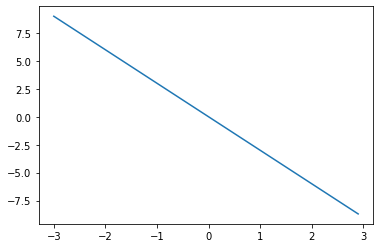

In [3]:
plt.plot(X.numpy(), f.numpy())
plt.show()

In [4]:
Y = f + 0.1 * torch.randn(X.size())

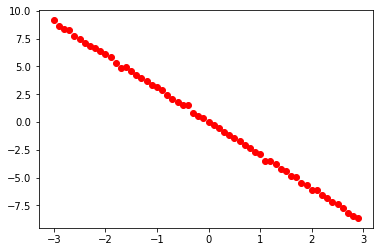

In [5]:
plt.plot(X.numpy(), Y.numpy(), 'ro')
plt.show()

Decission function: $\hat{y} = wx$

Cost function: $\frac{1}{N}\sum_{n=1}^N (y_n - wx_n)^2$

learning rate: $\eta = 0.1$

initial weight: $w_0 = 0$

In [6]:
w = torch.tensor(0.0, requires_grad = True)

In [7]:
def forward(X):
    return w * X

def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

```python
loss.backward() 
```
is the method will calculate or accumulate gradients of your loss.

$$w_{k+1} = w_{k} - \eta\frac{dl(w_k)}{dw}$$

In [8]:
lr = 0.1
COST = []
for epoch in range(4):
    Yhat = forward(X)
    loss = criterion(Yhat, Y)
    loss.backward()
    
    w.data = w.data - lr * w.grad.data
    w.grad.data.zero_()
    
    COST.append(loss.item())

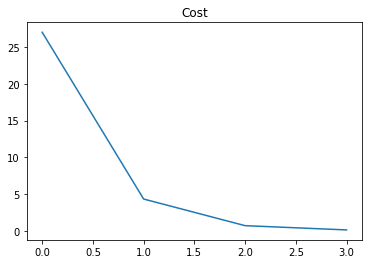

In [9]:
plt.plot(range(len(COST)), COST)
plt.title('Cost')
plt.show()

In [10]:
w

tensor(-2.9231, requires_grad=True)

## Example 2

In [11]:
X = torch.arange(-3.0, 3.0, 0.1).view(-1, 1)
f = -3 * X + 1

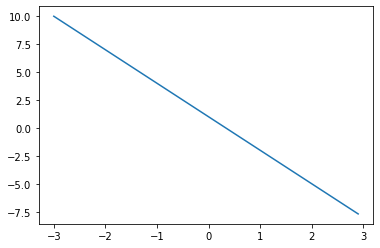

In [12]:
plt.plot(X.numpy(), f.numpy())
plt.show()

In [13]:
Y = f + 0.1 * torch.randn(X.size())

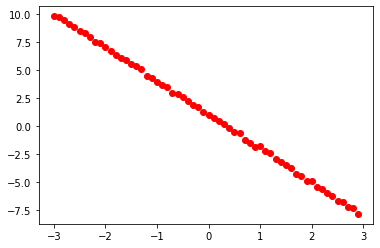

In [14]:
plt.plot(X.numpy(), Y.numpy(), 'ro')
plt.show()

Decission function: $\hat{y} = wx + b$

Cost function: $\frac{1}{N}\sum_{n=1}^N (y_n - (wx_n + b))^2$

learning rate: $\eta = 0.1$

initial weight: $w_0 = 0$

initial bias: $b_0 = 0$

In [15]:
w = torch.tensor(0.0, requires_grad = True)
b = torch.tensor(0.0, requires_grad = True)

In [16]:
def forward(X):
    return w * X + b

def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

```python
loss.backward() 
```
is the method will calculate or accumulate gradients of your loss.

Gradient:
$\begin{equation*}
\nabla l(w, b) = 
\begin{bmatrix}
\frac{\partial l(w, b)}{\partial w}\\\\
\frac{\partial l(w, b)}{\partial b}
\end{bmatrix}
\end{equation*}$

$$\begin{align}
w_{k + 1} =& w_k - \eta\frac{\partial l(w, b)}{\partial w}\\\\
b_{k + 1} =& b_k - \eta\frac{\partial l(w, b)}{\partial b}
\end{align}$$

In [17]:
lr = 0.1
COST = []
for epoch in range(4):
    Yhat = forward(X)
    loss = criterion(Yhat, Y)
    loss.backward()
    
    w.data = w.data - lr * w.grad.data
    w.grad.data.zero_()
    
    b.data = b.data - lr * b.grad.data
    b.grad.data.zero_()
    
    COST.append(loss.item())

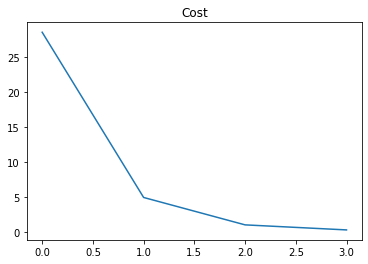

In [18]:
plt.plot(range(len(COST)), COST)
plt.title('Cost')
plt.show()

In [19]:
w

tensor(-2.9404, requires_grad=True)

In [20]:
b

tensor(0.6225, requires_grad=True)